$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 5** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Clustering**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Aristide** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 21/5** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Britta Thörnblom, 900718-1341, brittat@student.chalmers.se** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Adam Tonderski, 930524-1037, tadam@student.chalmers.se** <br />

General guidelines:
* Since there is no theoretical part for this assigment, submit this ipynb only (with completed code/results).
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above.
* All datasets can be downloaded from the course website.
* All plots/tables and other relevant information should be included.

# Practical problems

The follwing code might be useful for this excercise.

```python
import scipy.io
mat = scipy.io.loadmat('hw5_p1a.mat')
print (mat.keys())
X = mat['X']
```

## [K-Means Implementation, 20 points]

a. Implement the basic (linear) $k$-means algorithm as described in the lecture, using the euclidean distance. Use (uniformly) random points from the data as initialization for the centroids. Terminate the iterative procedure when the the cluster assignments do not change.

b. Run your implementation on the matrix $X$ in **hw5_p1a.mat** with $k=2$. Each row of the matrix is an observation, and each column is a feature. Store the cluster assignment both after 2 iterations, and at convergence. Produce a scatter plot of the data with colors indicating the cluster assignments at convergence and highlight points that have changed assignment after the second iteration.

c. Implement the kernel $k$-means algorithm as described in the lecture, using the Gaussian RBF-kernel.

d. Run the linear $k$-means **and** your kernel $k$-means on **hw5_p1b.mat** with $k=2$. For the Gaussian RBF-kernel, use $\sigma=0.2$. Produce scatter plots of the data, with color indicating the cluster assignment at convergence, one plot for each of the algorithms.

## [Discussion]

In the first dataset we can see that the classes are linearly separable so the basic implementation works fine. A bunch of points (marked with white stars) changed assignment after the second iteration.

In the second dataset the classes are arranged in circles, which makes it impossible to divide it into 2 clusters with a straight line. The basic algorithm might work more decently if we increase the number of clusters and let several clusters represent the same class (in this case the outer circle could be represented by many clusters arranged in a circle).

However, a much better approach is to use the kernel version of $k$-means and replace the euclidean distance with something that is more suitable to our problem. As you can see in the last plot, a Gaussian RBF-kernel fits this role perfectly (since the data is circular in nature).

dict_keys(['__header__', '__version__', '__globals__', 'X'])
4


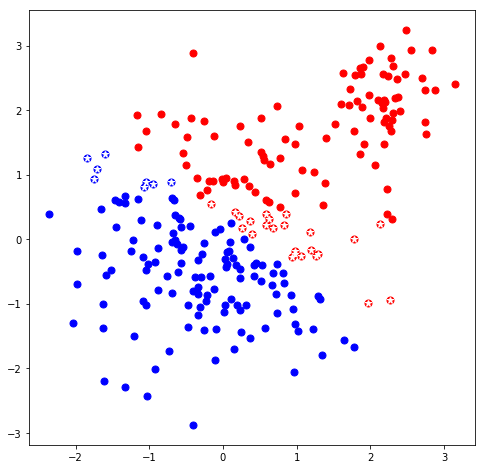

In [4]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
mat = scipy.io.loadmat('hw5_p1a.mat')
print (mat.keys())
X = mat['X']
k = 2
num_points = int(X.size/2)
cluster_assignment = np.zeros(num_points, np.int8)
# Guess the mus
changed_points = 1
num_dims = 2

mus_choice = np.random.choice(num_points, k)

mus = []
for i in range(k):
    this_mu = X[mus_choice[i]]
    x_val = this_mu[0]
    y_val = this_mu[1]
    mus.append(this_mu)

def get_distance(point, mu):
    # We can skip the sqrt
    return np.dot(point-mu, point-mu)


print(get_distance(np.asarray([0, 1]), np.asarray([0,3])))

steps = 1
while(changed_points != 0):
    changed_points = 0
    
    # ASSIGN POINTS TO CLUSTERS
    for point_counter, point in enumerate(X):
        distance_vector = np.zeros(k)
        for counter, mu in enumerate(mus):
            distance_vector[counter] = get_distance(point, mu)
        new_assignment = np.argmin(distance_vector)
        old_assignment = cluster_assignment[point_counter]
        if new_assignment != old_assignment:
            changed_points = changed_points + 1
            cluster_assignment[point_counter] = new_assignment
    
    # UPDATE MUS
    for counter, mu in enumerate(mus):
        my_points = X[cluster_assignment==counter]
        mus[counter] = np.sum(my_points, axis=0)/num_points
    if steps == 1:
        cluster_assignment_legacy = np.copy(cluster_assignment)
    steps = steps + 1
        
red_X = X[cluster_assignment==0]
blue_X = X[cluster_assignment==1]

plt.figure(figsize = (8, 8))
plt.plot(red_X[:,0], red_X[:,1], 'ro', ms = 7)
plt.plot(blue_X[:,0], blue_X[:,1], 'bo', ms = 7)

not_changed = (cluster_assignment == cluster_assignment_legacy)
star_X = X[not_changed==0]

plt.plot(star_X[:,0], star_X[:,1], 'w*', ms = 7)


dict_keys(['__header__', '__version__', '__globals__', 'X'])
4


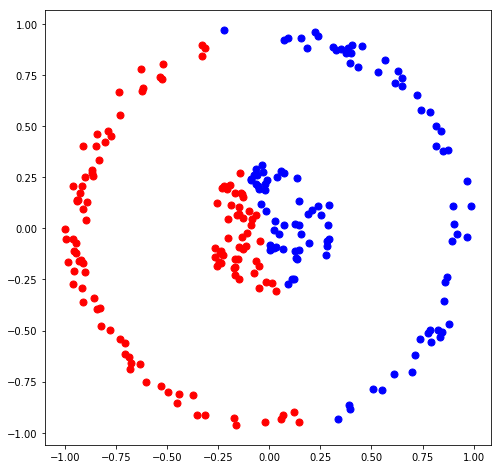

In [2]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
mat = scipy.io.loadmat('hw5_p1b.mat')
print (mat.keys())
X = mat['X']
k = 2
num_points = int(X.size/2)
cluster_assignment = np.zeros(num_points, np.int8)
# Guess the mus
changed_points = 1
num_dims = 2

mus_choice = np.random.choice(num_points, k)

mus = []
for i in range(k):
    this_mu = X[mus_choice[i]]
    x_val = this_mu[0]
    y_val = this_mu[1]
    mus.append(this_mu)

def get_distance(point, mu):
    # We can skip the sqrt
    return np.dot(point-mu, point-mu)


print(get_distance(np.asarray([0, 1]), np.asarray([0,3])))

steps = 1
while(changed_points != 0):
    changed_points = 0
    
    # ASSIGN POINTS TO CLUSTERS
    for point_counter, point in enumerate(X):
        distance_vector = np.zeros(k)
        for counter, mu in enumerate(mus):
            distance_vector[counter] = get_distance(point, mu)
        new_assignment = np.argmin(distance_vector)
        old_assignment = cluster_assignment[point_counter]
        if new_assignment != old_assignment:
            changed_points = changed_points + 1
            cluster_assignment[point_counter] = new_assignment
    
    # UPDATE MUS
    for counter, mu in enumerate(mus):
        my_points = X[cluster_assignment==counter]
        mus[counter] = np.sum(my_points, axis=0)/num_points
    if steps == 1:
        cluster_assignment_legacy = np.copy(cluster_assignment)
    steps = steps + 1
        
red_X = X[cluster_assignment==0]
blue_X = X[cluster_assignment==1]

plt.figure(figsize = (8, 8))
plt.plot(red_X[:,0], red_X[:,1], 'ro', ms = 7)
plt.plot(blue_X[:,0], blue_X[:,1], 'bo', ms = 7)



1
2
3
4
5


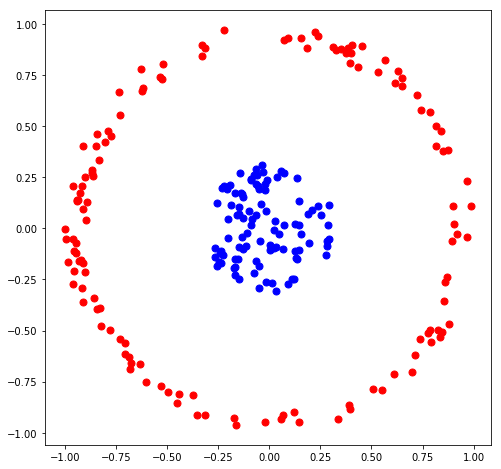

In [3]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import time
mat = scipy.io.loadmat('hw5_p1b.mat')
X = mat['X']
k = 2
num_points = int(X.size/2)
# Guess the mus
changed_points = 1
num_dims = 2
sigma = 0.2
kernel_factor = 1/(sigma*sigma*2)


cluster_assignment = np.random.randint(0, k, num_points)

def gaussian_RBF(point1, point2):
    diff = point1-point2
    # this diag thing feels like bullshit
    stuff_to_put_up = -kernel_factor*np.diag(diff.dot(diff.T))
    return np.exp(stuff_to_put_up)

def compute_new_assignment(points, assignment_vector, num_classes):
    assignment_matrix = np.zeros((num_points, num_classes))
    assignment_matrix[range(num_points),assignment_vector] = 1
    class_counts = np.sum(assignment_matrix, axis=0)
    
    # Precompute all pairwise kernels
    kernel_results = np.zeros((num_points,num_points))
    for i in range(num_points):
        kernel_results[i,:] = gaussian_RBF(points[i], points)
    
    distances = np.zeros((num_points, num_classes))
    for i in range(num_classes):
        ass_vec_class = assignment_matrix[:,i,None]
        first_term = 1
        second_term = -2/class_counts[i] * kernel_results.dot(assignment_matrix[:,i])
        third_term = 1/(class_counts[i]**2) * np.sum(ass_vec_class.dot(ass_vec_class.T) * kernel_results)
        distances[:,i] = first_term + second_term + third_term
        
    return np.argmin(distances, axis=1)

steps = 0
while(changed_points != 0 and steps < 200):    
    new_assignment = compute_new_assignment(X, cluster_assignment, k)
    changed_points = np.sum(new_assignment != cluster_assignment)
    cluster_assignment = new_assignment    
    steps += 1
    print(steps)
        
red_X = X[cluster_assignment==0]
blue_X = X[cluster_assignment==1]

plt.figure(figsize = (8, 8))
plt.plot(red_X[:,0], red_X[:,1], 'ro', ms = 7)
plt.plot(blue_X[:,0], blue_X[:,1], 'bo', ms = 7)
